In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
cust = pd.read_csv(r"G:\Amex\Amex\train_AUpWtIz/customer_demographics.csv")

In [3]:
cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


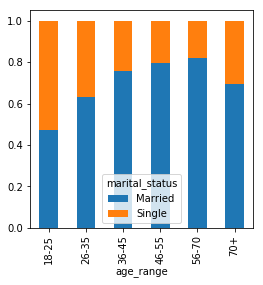

In [4]:
Gender=pd.crosstab(cust['age_range'],cust['marital_status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [29]:
d = {'18-25':'Single','26-35':'Married','36-45':'Married','46-55':'Married','56-70':'Married','70+':'Married'}

In [34]:
cus = cust
cus['marital_status'] = cus.apply(lambda x: d.get(cus['age_range']) if cus['marital_status'] is np.nan else cus['marital_status'],axis=1)

In [36]:
cus.drop(['no_of_children'],axis=1,inplace=True)

In [41]:
cus=cus.replace({'family_size':'5+'},5)

In [50]:
cus['family_size']=cus['family_size'].astype('int64')

In [55]:
le = preprocessing.LabelEncoder()
le.fit(cus.loc[:,'age_range'].values)
cus.loc[:,'age_range']=le.transform(cus.loc[:,'age_range'])
le.fit(cus.loc[:,'marital_status'].values)
cus.loc[:,'marital_status']=le.transform(cus.loc[:,'marital_status'])

In [60]:
cus.to_csv('customer_demographic1.csv',index=False)